In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

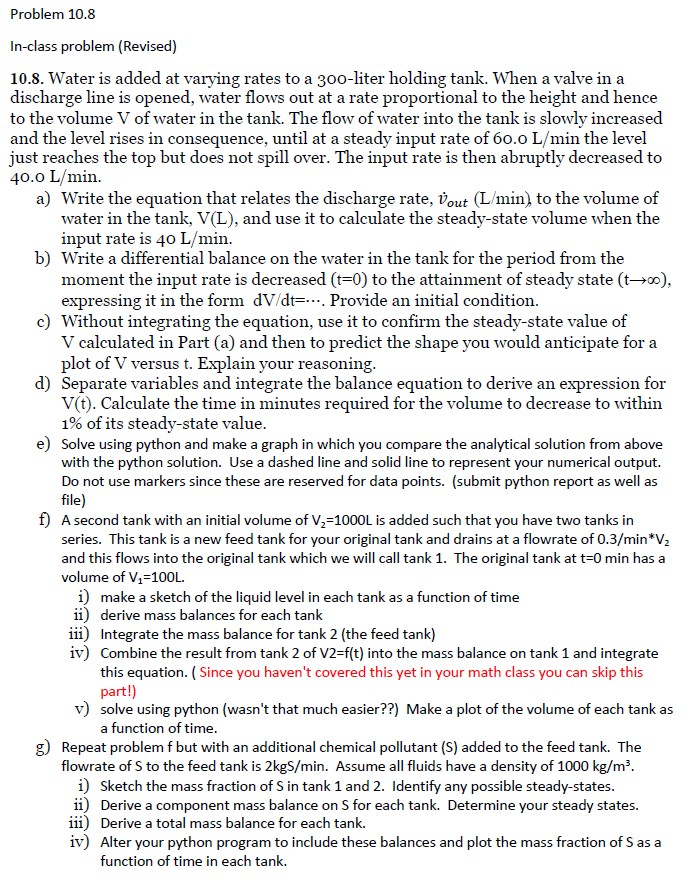

This is written using LaTeX in Markdown display mode<BR>
The control volume of this system is the water in the tank with a mass m or volume V<BR>
$$\text{Accumulation = rate of mass in - rate of mass out}$$ <BR>
$$\frac{dm}{dt}=\dot{m}_{in}-\dot{m}_{out}$$ 
$$\dot{m}_{in}=\rho \nu_{in}=\rho 40\,L/min$$<BR>
$$\dot{m}_{out}=\rho \nu_{out} =\rho \frac{0.2}{min}V $$<BR>
$$m=\rho V$$<BR>
$$\text{at}\, t=0\,V=300 L$$<BR>
Assuming constant density the mass balance results in a volume balance

$$\frac{dV}{dt}=40\,L/min-\frac{0.2}{min}V$$



In [3]:
#This function is to return the values of the derivatives 
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    V = Yfuncvec[0] 
    dVdt = 40-0.2*V
     
    dYfuncvecdt = [dVdt] 
    return dYfuncvecdt 


In [8]:
#Check on the above test of ODE fun at 5=0 and V=300L
x=40-0.2*300
print('initial slope is',x,' L/min')

initial slope is -20.0  L/min


In [5]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
V0 = [300] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[-20.0]


In [10]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,30) # Range for the independent variable t 
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,V0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.17187731,  1.89065038,  7.61087067, 13.28029702,
       20.14080752, 28.4896905 , 30.        ])
 t_events: None
        y: array([[300.        , 296.62086624, 268.51419214, 221.89682951,
        207.06805577, 201.81630486, 200.36367824, 200.26886462]])
 y_events: None


The analytical solution to this derivative is obtained as follows
$$\int_{300L}^V(\frac{dV}{dt})dt=\int_0^{t} \left(40\frac{L}{min}-(\frac{0.2}{min})V\right) dt$$
rearranging<br>
$$\int_{300L}^V\frac{dV}{40\frac{L}{min}-\frac{0.2}{min}V}= t$$
integrating
$$\ln\left[{\frac{40 \frac{L}{min}- \frac{0.2}{min} V}{40 \frac{L}{min}- \frac{0.2}{min} 300L}}\right]=\frac{-0.2}{min}t$$
           

$$V=200L+100L\exp{\left(-\frac{0.2}{min}t\right)}$$

In [18]:
#makes a smoother line by using more values
teval=np.linspace(tspan[0],tspan[1],21)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
       16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ])
 t_events: None
        y: array([[300.        , 274.08178751, 254.82621724, 240.54634   ,
        230.09624796, 222.3868549 , 216.56264695, 212.25517759,
        209.10377205, 206.76351427, 204.98847087, 203.68011978,
        202.74003981, 202.05831732, 201.52471754, 201.1121779 ,
        200.81332998, 200.60925724, 200.47167451, 200.36292914,
        200.26886462]])
 y_events: None


Text(0, 0.5, 'Volume ($L$)')

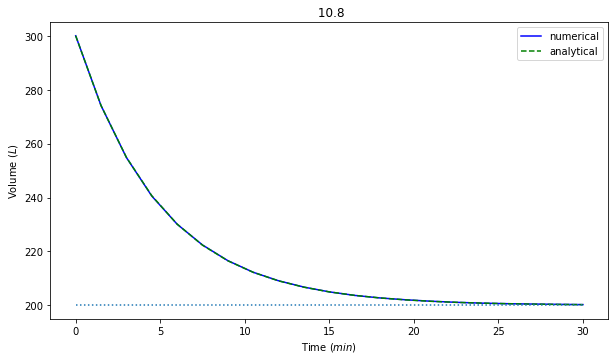

In [19]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='numerical')
plt.plot(sol.t,200+100*np.exp(-0.2*sol.t),'g',linestyle='--',label='analytical')

plt.plot([0,30],[200, 200],linestyle=':')#This plots the horizontal line at V=0


plt.legend()
plt.title(' 10.8')
plt.xlabel('Time ($min$)')
plt.ylabel('Volume ($L$)')

In [20]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
Vanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t      V (numerical)   V Analytical  ')
print('  (min)       (L)         (L)     ')

row=0
for row in range(numrows):
    Vanal[row]=200+100*np.exp(-0.2*sol.t[row])
    print('{:6.2f} {:10.1f}     {:10.1f}  '.format(sol.t[row],sol.y[0,row],Vanal[row] ))



        Summary of Results

   t      V (numerical)   V Analytical  
  (min)       (L)         (L)     
  0.00      300.0          300.0  
  1.50      274.1          274.1  
  3.00      254.8          254.9  
  4.50      240.5          240.7  
  6.00      230.1          230.1  
  7.50      222.4          222.3  
  9.00      216.6          216.5  
 10.50      212.3          212.2  
 12.00      209.1          209.1  
 13.50      206.8          206.7  
 15.00      205.0          205.0  
 16.50      203.7          203.7  
 18.00      202.7          202.7  
 19.50      202.1          202.0  
 21.00      201.5          201.5  
 22.50      201.1          201.1  
 24.00      200.8          200.8  
 25.50      200.6          200.6  
 27.00      200.5          200.5  
 28.50      200.4          200.3  
 30.00      200.3          200.2  


In [27]:
#This function is to return the values of the  derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
    t = Yfuncvec[0] 
    dtdV = 1/(40-0.2*V)
     
    dYfuncvecdt = [dtdV] 
    return dYfuncvecdt 


In [37]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (300,202) # Range for the independent variable V 
t0 = [0]#initial value of time
#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,t0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([300.        , 299.9999    , 299.9989    , 299.9889    ,
       299.8889    , 298.8889    , 288.8889    , 238.0033193 ,
       221.60980643, 205.21629356, 202.        ])
 t_events: None
        y: array([[0.00000000e+00, 5.00000250e-06, 5.50003025e-05, 5.55030805e-04,
        5.55808809e-03, 5.58659412e-02, 5.88914552e-01, 4.83820592e+00,
        7.66086830e+00, 1.47976032e+01, 1.95925687e+01]])
 y_events: None


In [38]:
#To match the analytical solution a higher tolerance is added
sol=solve_ivp(ODEfun,tspan,t0,rtol=1e-6) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 170
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([300.        , 299.9999    , 299.9989    , 299.9889    ,
       299.8889    , 298.8889    , 288.8889    , 267.09208365,
       251.12798164, 238.43071944, 228.59838249, 221.0916241 ,
       215.43511173, 211.21729099, 208.10107224, 205.81713871,
       204.15517244, 202.9535893 , 202.        ])
 t_events: None
        y: array([[0.00000000e+00, 5.00000250e-06, 5.50003025e-05, 5.55030805e-04,
        5.55808809e-03, 5.58659412e-02, 5.88914552e-01, 1.99552063e+00,
        3.35419124e+00, 4.78156528e+00, 6.25910014e+00, 7.78147099e+00,
        9.34262660e+00, 1.09385691e+01, 1.25658692e+01, 1.42218090e+01,
        1.59040822e+01, 1.76107464e+01, 1.95601175e+01]])
 y_events: None


In [39]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
tanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   V      t (numerical)   t Analytical  ')
print('  (L)       (min)         (min)     ')

row=0
for row in range(numrows):
    tanal[row]=np.log((sol.t[row]-200)/100)/(-0.2)
    print('{:6.2f} {:10.4f}     {:10.5f}  '.format(sol.t[row],sol.y[0,row],tanal[row] ))


        Summary of Results

   V      t (numerical)   t Analytical  
  (L)       (min)         (min)     
300.00     0.0000       -0.00000  
300.00     0.0000        0.00001  
300.00     0.0001        0.00006  
299.99     0.0006        0.00056  
299.89     0.0056        0.00556  
298.89     0.0559        0.05587  
288.89     0.5889        0.58891  
267.09     1.9955        1.99552  
251.13     3.3542        3.35419  
238.43     4.7816        4.78157  
228.60     6.2591        6.25910  
221.09     7.7815        7.78147  
215.44     9.3426        9.34263  
211.22    10.9386       10.93857  
208.10    12.5659       12.56587  
205.82    14.2218       14.22181  
204.16    15.9041       15.90408  
202.95    17.6107       17.61075  
202.00    19.5601       19.56012  


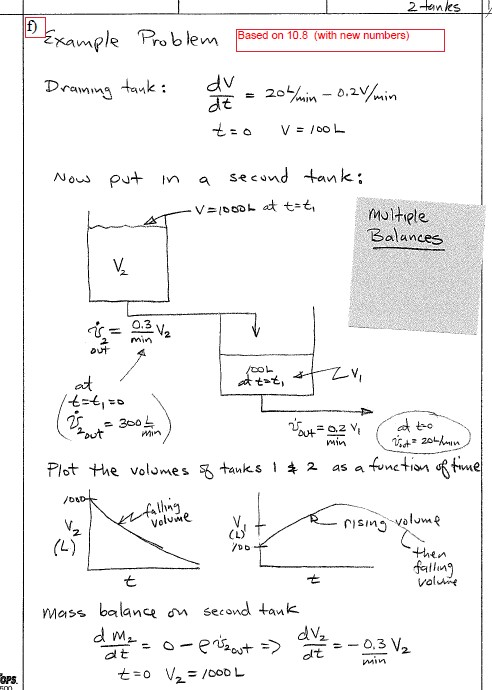

In [46]:
#This function is to return the values of the derivatives 
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    V1 = Yfuncvec[0] 
    V2 = Yfuncvec[1] 
   
    dV1dt= 0.3*V2-0.2*V1
    dV2dt = 0-0.3*V2
    
     
    dYfuncvecdt = [dV1dt,dV2dt] 
    return dYfuncvecdt 


In [60]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)

tspan = (0,30) # Range for the independent variable t 
teval=np.linspace(tspan[0],tspan[1],51)
V0=[100,1000]#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
        6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6,
       13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. , 18.6, 19.2,
       19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. , 24.6, 25.2, 25.8,
       26.4, 27. , 27.6, 28.2, 28.8, 29.4, 30. ])
 t_events: None
        y: array([[1.00000000e+02, 2.43643697e+02, 3.45544790e+02, 4.14678955e+02,
        4.58034955e+02, 4.81551311e+02, 4.90158130e+02, 4.87418418e+02,
        4.76191927e+02, 4.58963208e+02, 4.37776368e+02, 4.13954412e+02,
        3.88516513e+02, 3.62367939e+02, 3.36294806e+02, 3.10787791e+02,
        2.86086374e+02, 2.62406115e+02, 2.39944305e+02, 2.18872358e+02,
        1.99217626e+02, 1.80938415e+02, 1.64003955e+02, 1.48388839e+02,
        1.34071049e+0

Text(0, 0.5, 'Volume ($L$)')

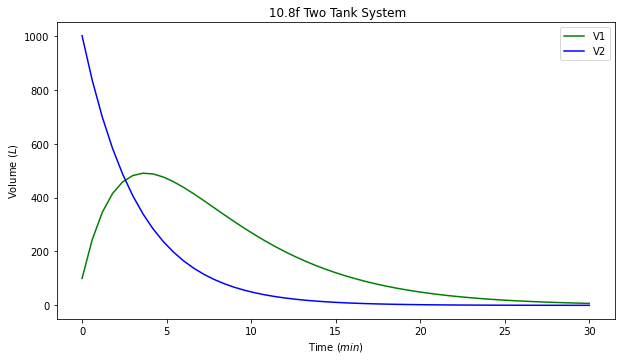

In [61]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'g',label='V1')
plt.plot(sol.t,sol.y[1],'b',label='V2')
#         200+100*np.exp(-0.2*sol.t),'g',linestyle='--',label='analytical')


plt.legend()
plt.title(' 10.8f Two Tank System')
plt.xlabel('Time ($min$)')
plt.ylabel('Volume ($L$)')

In [62]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)

tspan = (0,30) # Range for the independent variable t 
V0=[100,1000]#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,V0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.08713177,  0.95844948,  3.11265977,  5.51713382,
        8.21586061, 11.16281172, 14.22342357, 17.32908396, 20.45021348,
       23.57615345, 26.70323796, 29.83046631, 30.        ])
 t_events: None
        y: array([[1.00000000e+02, 1.23848834e+02, 3.08913234e+02, 4.84177299e+02,
        4.55086105e+02, 3.44248871e+02, 2.27029282e+02, 1.38152125e+02,
        8.02706687e+01, 4.53817496e+01, 2.52220461e+01, 1.38614970e+01,
        7.55995094e+00, 7.31427924e+00],
       [1.00000000e+03, 9.74199149e+02, 7.50110532e+02, 3.93079778e+02,
        1.91098478e+02, 8.50669703e+01, 3.51581631e+01, 1.40459617e+01,
        5.53655499e+00, 2.17232125e+00, 8.51109555e-01, 3.33348615e-01,
        1.30554912e-01, 1.24080905e-01]])
 y_events: None


In [69]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
V1anal=np.zeros(numrows)# This initializes an array that will store the analytical solution
V2anal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t          V1       V1anal       V2      V2anal          ')
print(' (min)        (L)       (L)         (L)        (L)          ')

row=0
for row in range(numrows):
    V2anal[row]=1000*np.exp(-0.3*sol.t[row])
    V1anal[row]=-3000*np.exp(-0.3*sol.t[row])+3100*np.exp(-0.2*sol.t[row])
    print('{:6.2f} {:10.1f} {:10.1f} {:10.2f} {:10.2f} '.format(sol.t[row],sol.y[0,row],V1anal[row],sol.y[1,row],V2anal[row] ))


        Summary of Results

   t          V1       V1anal       V2      V2anal          
 (min)        (L)       (L)         (L)        (L)          
  0.00      100.0      100.0    1000.00    1000.00 
  0.09      123.8      123.8     974.20     974.20 
  0.96      308.9      308.9     750.11     750.11 
  3.11      484.2      484.2     393.08     393.06 
  5.52      455.1      455.2     191.10     191.07 
  8.22      344.2      344.3      85.07      85.03 
 11.16      227.0      227.1      35.16      35.12 
 14.22      138.2      138.2      14.05      14.02 
 17.33       80.3       80.3       5.54       5.52 
 20.45       45.4       45.4       2.17       2.17 
 23.58       25.2       25.2       0.85       0.85 
 26.70       13.9       13.9       0.33       0.33 
 29.83        7.6        7.6       0.13       0.13 
 30.00        7.3        7.3       0.12       0.12 


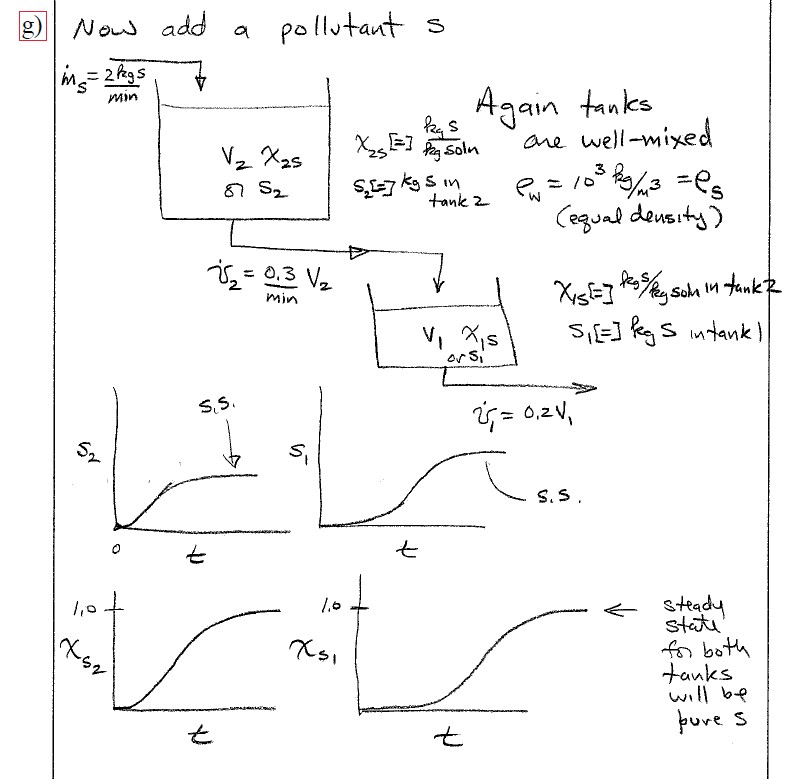


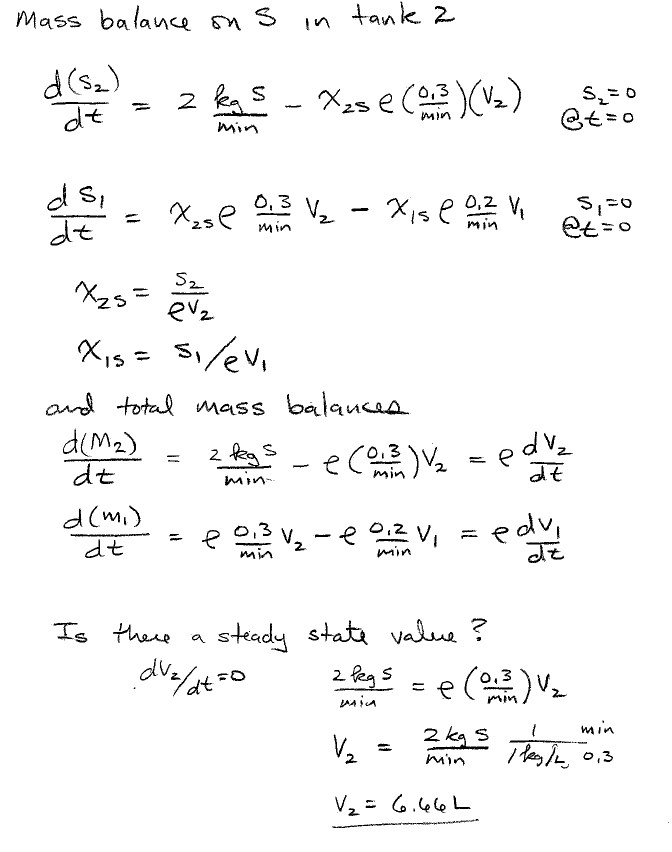

In [13]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(t,Yfuncvec):#fun(t,y) and return dy/dt
    Mw1 = Yfuncvec[0] 
    Ms1 = Yfuncvec[1] 
    Mw2 = Yfuncvec[2] 
    Ms2 = Yfuncvec[3] 
   
    rho=1000
    M1=Mw1+Ms1
    M2=Mw2+Ms2
    V2=M2/rho
    V1=M1/rho
    Xw2=Mw2/M2
    Xs2=Ms2/M2
    Xw1=Mw1/M1    
    Xs1=Ms1/M1
    
    dMw1dt=rho*0.3*V2*Xw2-rho*0.2*Xw1*V1
    dMs1dt=rho*0.3*V2*Xs2-rho*0.2*Xs1*V1
    dMw2dt=-rho*0.3*V2*Xw2
    dMs2dt=2-0.3*V2*Xs2*rho
   
    
    
    dYfuncvecdt = [dMw1dt, dMs1dt,dMw2dt, dMs2dt ] 
    return dYfuncvecdt 

In [14]:
#test of function ODEfun.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
V0 = [100,0,1000,0] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[280.0, 0.0, -300.0, 2.0]


In [19]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,40) # Range for the independent variable t 

M0=[100,0,1000,0]#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V and mass fractions
sol=solve_ivp(ODEfun,tspan,M0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 110
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 7.07102191e-04, 7.77812410e-03, 7.84883432e-02,
       7.15739169e-01, 2.08697891e+00, 4.11950461e+00, 6.67521082e+00,
       9.62861694e+00, 1.28271854e+01, 1.61215066e+01, 1.94466939e+01,
       2.27810489e+01, 2.61177030e+01, 2.94546837e+01, 3.27920202e+01,
       3.61313858e+01, 3.94775812e+01, 4.00000000e+01])
 t_events: None
        y: array([[1.00000000e+02, 1.00197952e+02, 1.02173463e+02, 1.21531524e+02,
        2.66242709e+02, 4.38123583e+02, 4.88229733e+02, 4.10710861e+02,
        2.84820291e+02, 1.74305502e+02, 9.94768660e+01, 5.46227176e+01,
        2.93195753e+01, 1.55152732e+01, 8.13388515e+00, 4.23679964e+00,
        2.19623909e+00, 1.13339936e+00, 1.02195412e+00],
       [0.00000000e+00, 1.49980377e-07, 1.81262532e-05, 1.82412925e-03,
        1.36539797e-01, 9.30746969e-0

In [24]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,75) # Range for the independent variable t 
teval=np.linspace(tspan[0],tspan[1],101)
V0=[100,0,1000,0]#The inputs to solve_ivp are the functions in ODEfun, the integration start&stop, 
#and the initial values of V and mass fractions
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 158
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
        6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
       13.5 , 14.25, 15.  , 15.75, 16.5 , 17.25, 18.  , 18.75, 19.5 ,
       20.25, 21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25,
       27.  , 27.75, 28.5 , 29.25, 30.  , 30.75, 31.5 , 32.25, 33.  ,
       33.75, 34.5 , 35.25, 36.  , 36.75, 37.5 , 38.25, 39.  , 39.75,
       40.5 , 41.25, 42.  , 42.75, 43.5 , 44.25, 45.  , 45.75, 46.5 ,
       47.25, 48.  , 48.75, 49.5 , 50.25, 51.  , 51.75, 52.5 , 53.25,
       54.  , 54.75, 55.5 , 56.25, 57.  , 57.75, 58.5 , 59.25, 60.  ,
       60.75, 61.5 , 62.25, 63.  , 63.75, 64.5 , 65.25, 66.  , 66.75,
       67.5 , 68.25, 69.  , 69.75, 70.5 , 71.25, 72.  , 72.75, 73.5 ,
       74.25, 75.  ])
 t_events: None
        y: ar

Text(0, 0.5, 'Mass fraction ')

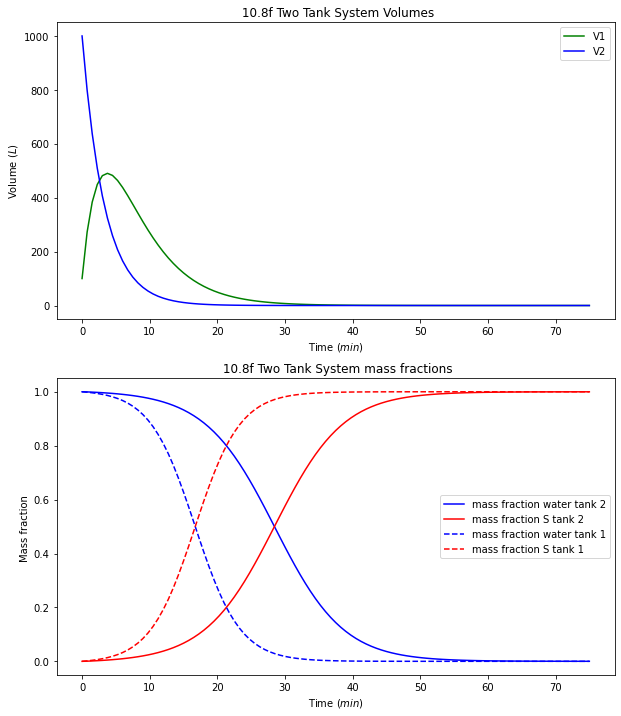

In [25]:
#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'g',label='V1')
plt.plot(sol.t,sol.y[2],'b',label='V2')
#         200+100*np.exp(-0.2*sol.t),'g',linestyle='--',label='analytical')


plt.legend()
plt.title(' 10.8f Two Tank System Volumes')
plt.xlabel('Time ($min$)')
plt.ylabel('Volume ($L$)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[0]/(sol.y[0]+sol.y[1]),'b',label='mass fraction water tank 2')

plt.plot(sol.t,sol.y[1]/(sol.y[0]+sol.y[1]),'r',label='mass fraction S tank 2')
plt.plot(sol.t,sol.y[2]/(sol.y[2]+sol.y[3]),'b',linestyle='--', label='mass fraction water tank 1')

plt.plot(sol.t,sol.y[3]/(sol.y[2]+sol.y[3]),'r',linestyle='--',label='mass fraction S tank 1')



plt.legend()
plt.title(' 10.8f Two Tank System mass fractions')
plt.xlabel('Time ($min$)')
plt.ylabel('Mass fraction ')